In [ ]:
# default_exp api_tutorial

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import pandas as pd
from dcl_stats_n_plots import stats
from dcl_stats_n_plots import plots

# API tutorial

> Turorial on how to interact with the dcl_stats_n_plots API

## Getting started

dcl_stats_n_plots is available from PyPi, so just run:

> `pip install dcl-stats-n-plots`

for installation. If you want a more detailed guide, please have a look at our [installation guide](https://dsegebarth.github.io/dcl_stats_n_plots/gui_tutorial.html#Getting-started). For this tutorial, we will use some demo files with dummy data, which are available [here](https://github.com/DSegebarth/dcl_stats_n_plots/tree/master/test_data).

In the following, you will find some examples for each type of implemented statistical analysis, including the corresponding plotting and annotation functions. Currently, the implemented analyses are:

1. Comparison of two or more independent samples
2. Comparison of one group to a reference value
3. Mixed-Model ANOVA (comparison of two or more groups with repeated measures)

> Note: This package relies heavily on the correct design of the input data. Therefore, please take some time before using one of the implemented functionalities and make sure you got the input data organized in the right way. In general, this packages requires the input data to be organized in the so-called "long format" with a fixed column order. Please check out the "Expected input data format" section for the respective test for detailed information.

## Comparison of two of more independent samples

### Expected input data format

For this analysis, you only have to provide two columns. The first one that contains the actual data values, and the second column that specifies to which group the respective data value belongs. In Microsoft Excel, this might look like the following:

![api_tutorial_01](https://raw.githubusercontent.com/DSegebarth/dcl_stats_n_plots/master/media/api_tutorial_01.png)

Where the first two data values belong to the group called "group_a", the third and fourth to a second group called "group_b", and the sixth and seventh value belong to a third group called "group_c". You probably got the idea ;-)

You are entirely free to choose any column names (for instance "distance \[cm\]" instead of "data", or "genotype" instead of "group_id") and also to provide your favorite group names (e.g. "wildtype" instead of "group_a" and "knockout" for "group_b"). 

> Note: The column name of your data column will be used as the default y-axis label, but you will still be able to modify that on demand.

> Note: The order of appearance of the groups in the group column (top to bottom) will be used as the default x-axis order, but you will still be able to modify that on demand.

### Compute the stats

Now that we know how the input data has to be organized, let´s start with the statistical analysis of our dataset, using one of our dummy data test files, which are available [here](https://github.com/DSegebarth/dcl_stats_n_plots/tree/master/test_data). This dataset contains a total of 60 data values from five different groups (group_a - group_e, 12 values per group). For reasons of clarity, only the first 5 rows will be displayed.

In [ ]:
import pandas as pd

df = pd.read_excel('test_data/independent_samples.xlsx')
df.head()

,data,group_id
0,49.777617,group_a
1,89.128475,group_a
2,30.198986,group_a
3,19.939498,group_a
4,51.822569,group_a


To perform the statistical analysis, all we now have to do is pass this data as Pandas DataFrame to the `independent_samples` function of the stats module.
This will return a dictionary containing the results of the statistical analysis, but also some automatically extracted parameters that will be of use for both plotting and annotation of the data later on. For the exact details of which statistical tests are performed, please head over to the documentation of the `independent_samples` function. In brief: 

1. The prerequisites for parametric testing (normal distribution and equality of variances) are assessed
2. Parametric or non-parametric tests are used accordingly
3. If the dataset contains more than two groups, pairwise comparisons of all possible combinations are performed and the results are corrected for multiple comparisons

The results of the pairwise comparisons can be accessed as follows:

In [ ]:
from dcl_stats_n_plots import stats

results = stats.independent_samples(df)

results['summary']['pairwise_comparisons']

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,group_id,group_a,group_b,False,False,93.0,two-sided,0.236584,0.236584,holm,0.716468
1,group_id,group_a,group_c,False,False,136.0,two-sided,0.000246,0.000985,holm,1.780161
2,group_id,group_a,group_d,False,False,144.0,two-sided,0.000037,0.000366,holm,2.582727
3,group_id,group_a,group_e,False,False,144.0,two-sided,0.000037,0.000366,holm,3.060401
4,group_id,group_b,group_c,False,False,133.0,two-sided,0.000478,0.001433,holm,1.853544
5,group_id,group_b,group_d,False,False,144.0,two-sided,0.000037,0.000366,holm,3.318169
6,group_id,group_b,group_e,False,False,144.0,two-sided,0.000037,0.000366,holm,3.397118
7,group_id,group_c,group_d,False,False,144.0,two-sided,0.000037,0.000366,holm,2.755793
8,group_id,group_c,group_e,False,False,144.0,two-sided,0.000037,0.000366,holm,2.643251
9,group_id,group_d,group_e,False,False,117.0,two-sided,0.010193,0.020386,holm,1.476439


If there were more than two groups present, the results of the group level statistical test can be accessed as:

In [ ]:
results['summary']['group_level_statistic']

,Source,ddof1,H,p-unc
Kruskal,group_id,4,50.278689,3.158030e-10


> Note: Again, for more detailed information about the statistical tests, as well as the generated output, please have a look at the documentation of the `independent_samples` function. Here you will also find links to the corresponding functions of the python package "pingouin", which is used for statistical testing.

### Plot the data and annotate the stats:

With the `results` dictionary and our dataset as Pandas DataFrame, we have everything we need to plot the data and annotate the stats in one go.

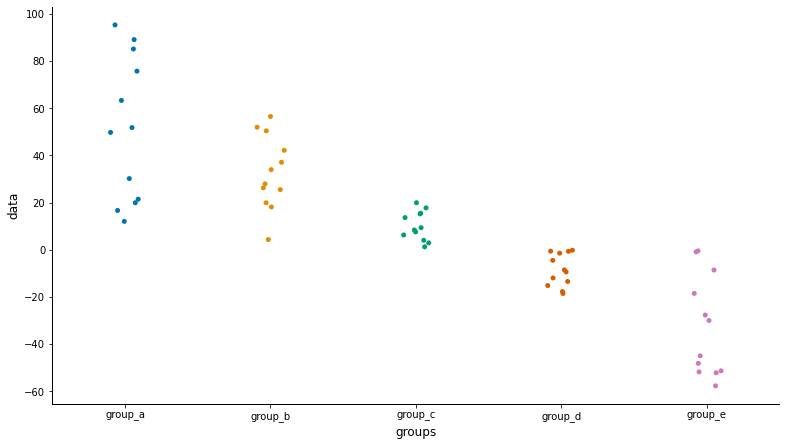

In [ ]:
from dcl_stats_n_plots import plots

params = {'set_marker_size': 20,
          'color_palette': 'viridis',
          'set_xaxis_label_text': 'hund'}

plots.plot_independent_samples(df, plot_type = 'stripplot')

> Warning: To be continued...